# MIS 451 - K-Means Clustering

## Objective

The objective of this lab is to apply K-Means clustering to segment customers based on their demographic and behavioral attributes, including Gender, Age, Annual Income, and Spending Score.

- Explore the structure and distribution of customer data through EDA.
- Use the Elbow Method to determine the optimal number of clusters.
- Apply K-Means clustering to uncover meaningful customer groups.
- Interpret and visualize the results to support data-driven marketing strategies.

This lab emphasizes hands-on skills in unsupervised learning, feature preprocessing, and business-oriented cluster profiling.

## Importing the libraries

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [21]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers (1).csv


In [22]:
dataset = pd.read_csv('Mall_Customers.csv')

In [23]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [24]:
# This demo for use 2 attributes for simple demo (Annual Income (k$) and Spending Score (1-100))
X = dataset.iloc[:, [3, 4]].values

In [25]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

## Using the elbow method to find the optimal number of clusters

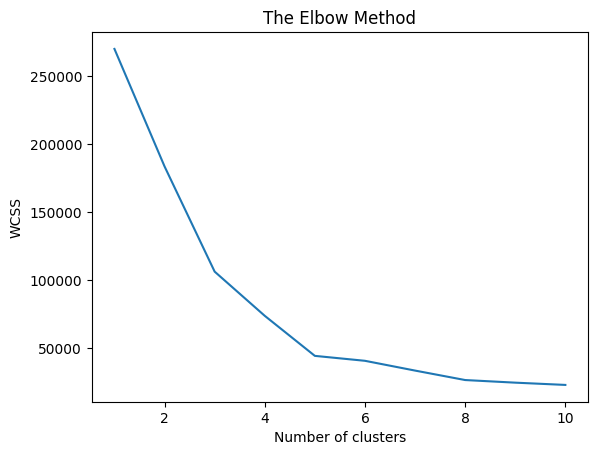

In [26]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset

In [27]:
# 5 seem the best number
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

## Visualising the clusters

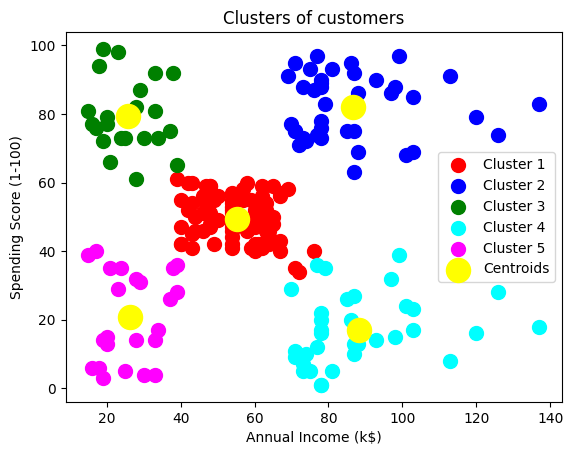

In [28]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Your tasks:

## Question 1:  Adding cluster labels to the original dataframe and save it as csv

In [29]:
# Adding cluster labels to the original dataframe
# Your code here
dataset['Cluster']= y_kmeans

In [30]:
# ouput
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


![image.png](attachment:image.png)

In [31]:
# Save it to csv name: 'Clustered_Customers.csv'
# Your code here
dataset.to_csv('clustered_output.csv', index=False)

 ## Question 2: Exploratory Data Analysis (EDA) code snippets to help you understand the features across clusters in your customer dataset.
**Note: Feel free to use ChatGPT for this question!**

In [32]:
# Your code here
cluster_summary = dataset.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary)

         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                   
0         86.320988  42.716049           55.296296               49.518519
1        162.000000  32.692308           86.538462               82.128205
2         23.090909  25.272727           25.727273               79.363636
3        164.371429  41.114286           88.200000               17.114286
4         23.000000  45.217391           26.304348               20.913043


In [33]:
print(dataset['Cluster'].value_counts())

Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64


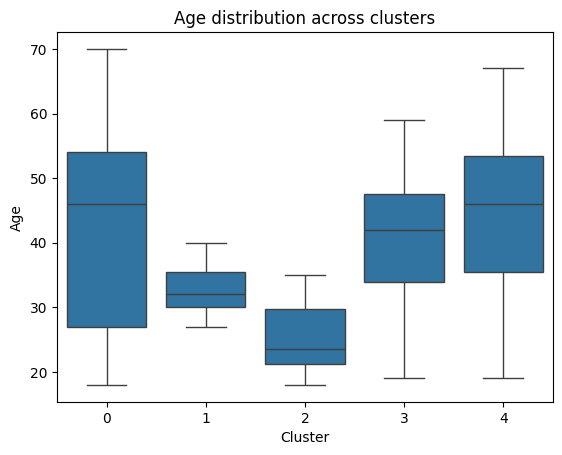

In [34]:
# Your code here
import seaborn as sns
sns.boxplot(x='Cluster', y='Age', data=dataset)
plt.title('Age distribution across clusters')
plt.show()

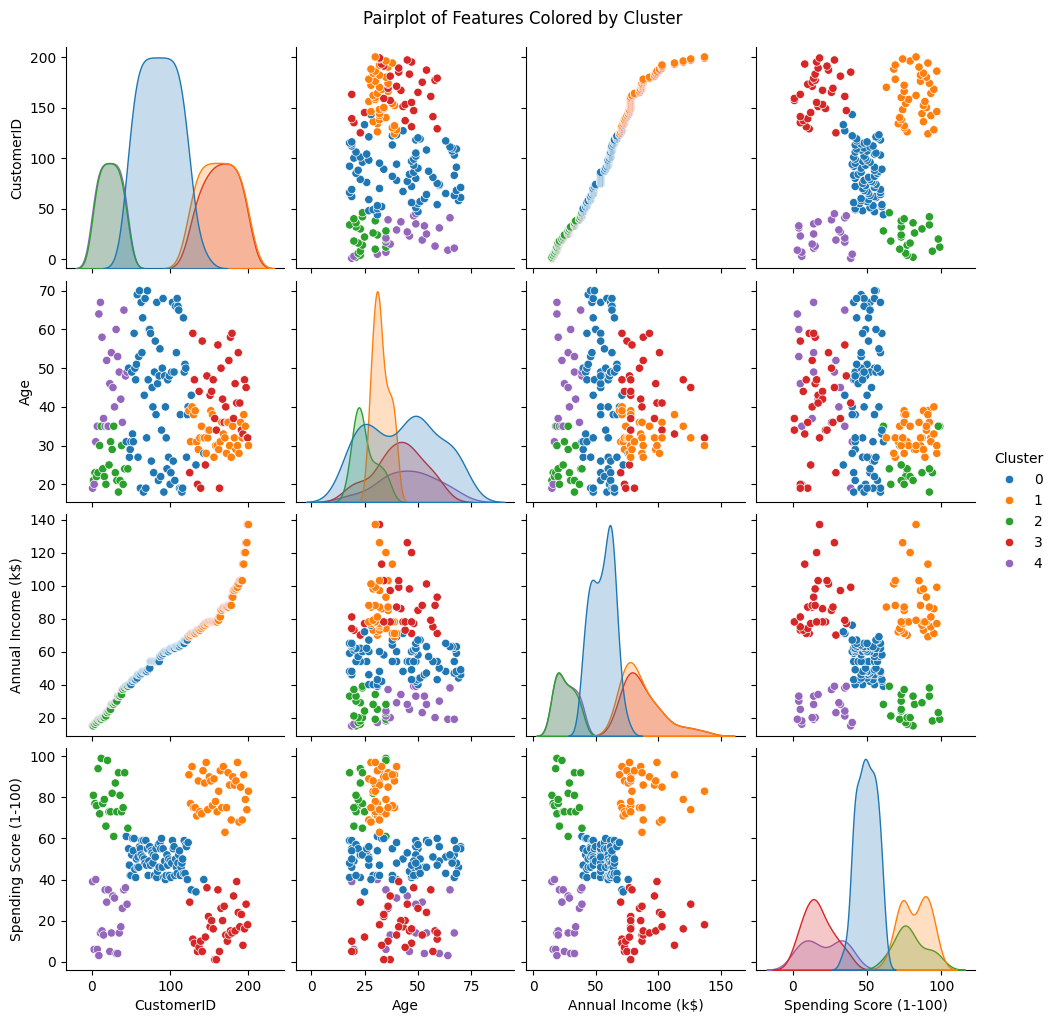

In [35]:
sns.pairplot(dataset, hue='Cluster', diag_kind='kde', palette='tab10')
plt.suptitle('Pairplot of Features Colored by Cluster', y=1.02)
plt.show()

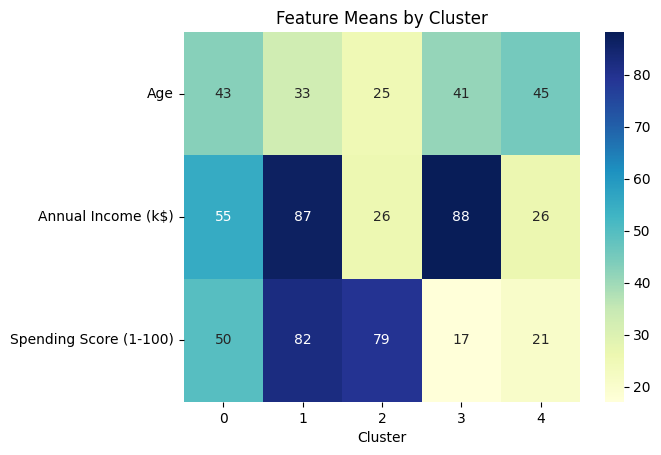

In [36]:
cluster_summary_no_id = cluster_summary.drop(columns=['CustomerID'])

sns.heatmap(cluster_summary_no_id.T, annot=True, cmap="YlGnBu")
plt.title('Feature Means by Cluster')
plt.show()

## Question 3: Try with all attributes (include Age and Genre) (Optional





### Any issues? Explain!

**Note: Feel free to use ChatGPT for this question!**

When attempting to include all attributes ('Age', 'Genre', 'Annual Income') arise => due to the nature of the K-Means algorithm and the types of data involved.

K-Means algorithm is designed for numerical data. The 'Genre' attribute is categorical (Male/Female) => convert the 'Genre' column into a numerical format.

In [38]:
dataset = pd.get_dummies(data=dataset, columns=['Genre'], drop_first=True)

In [41]:
feature_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Genre_Male']
X = dataset[feature_columns].values

print("Feature set for datset (first 5 rows):")
print(X[:5])
print(f"Shape of X: {X.shape}")

Feature set for datset (first 5 rows):
[[19 15 39 True]
 [21 15 81 True]
 [20 16 6 False]
 [23 16 77 False]
 [31 17 40 False]]
Shape of X: (200, 4)


Feature scaling

K-Means is sensitive to feature scales, and now 'Age', 'Annual Income', and 'Spending Score' are together, it's important to scale them.


In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nScaled feature set for Q3 (first 5 rows):")
print(X_scaled[:5])


Scaled feature set for Q3 (first 5 rows):
[[-1.42456879 -1.73899919 -0.43480148  1.12815215]
 [-1.28103541 -1.73899919  1.19570407  1.12815215]
 [-1.3528021  -1.70082976 -1.71591298 -0.88640526]
 [-1.13750203 -1.70082976  1.04041783 -0.88640526]
 [-0.56336851 -1.66266033 -0.39597992 -0.88640526]]


Elbow Method

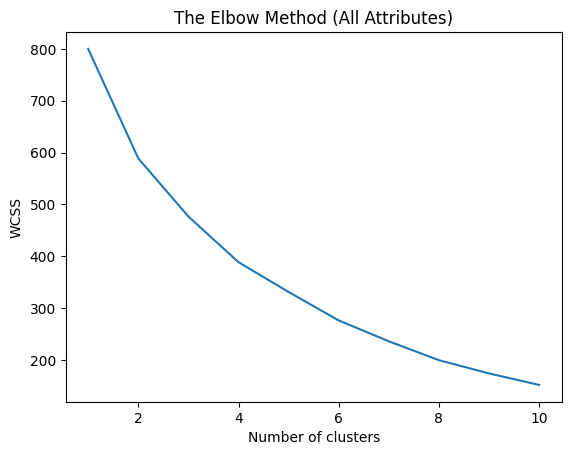

In [43]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method (All Attributes)')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

=> k=5 still appears reasonable

Training the K-Means Model with All Attributes

In [44]:
k_optimal = 5
kmeans_final = KMeans(n_clusters=k_optimal, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans_final.fit_predict(X_scaled)

print("\nCluster labels for dataset (first 20 customers):")
print(y_kmeans [:20])


Cluster labels for dataset (first 20 customers):
[3 3 3 3 3 3 2 3 4 3 4 3 2 3 4 3 2 3 4 3]


In [45]:
dataset['Cluster_AllAttributes'] = y_kmeans
print("\nDataset with new cluster labels (first 5 rows):")
print(dataset.head())


Dataset with new cluster labels (first 5 rows):
   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Cluster  \
0           1   19                  15                      39        4   
1           2   21                  15                      81        2   
2           3   20                  16                       6        4   
3           4   23                  16                      77        2   
4           5   31                  17                      40        4   

   Genre_Male  Cluster_AllAttributes  
0        True                      3  
1        True                      3  
2       False                      3  
3       False                      3  
4       False                      3  


# **SOME EXPLANATION FOR QUESTION 3**

When including all attributes ('Age', 'Genre', 'Annual Income (k$)', and 'Spending Score (1-100)'), some problems arise:

**1. Handling categorical data ('Genre')**

The K-Means algorithm inherently works with numerical data. The 'Genre' attribute (Male/Female) is categorical and cannot be used directly.

To use 'Genre', it must be converted into a numerical representation. (One-Hot Encoding)

=> The choice of encoding can influence the distance calculations and thus the resulting clusters. One-hot encoding increases the dimensionality of the dataset.

**2. Feature scaling**

The attributes 'Age' (e.g., 18-70), 'Annual Income (k$)' (e.g., 15-137), and 'Spending Score (1-100)' (1-100) have vastly different scales and units. K-Means is sensitive to these differences. => StandardScaler standardizes features by removing the mean and scaling to unit variance.

=> Without scaling, 'Annual Income' would likely dominate the clustering process over 'Age' or 'Spending Score'. Scaling leads to more balanced and meaningful clusters.

**3. Increased dimensionality**

Moving from 2 features to 4 increases the dimensionality of the data.

The concept of distance can become less intuitive. The distance between the farthest and nearest points can become less distinguishable. Data points become sparser, making it harder to form dense, distinct clusters. The effectiveness of the Elbow Method for choosing 'k' might decrease, as the "elbow" point can become less clear.

=> Clusters might be less well-defined, and identifying the optimal number of clusters can be more challenging.

**4. Interpreting the meaning of each cluster becomes more complex with additional features**

Instead of just describing clusters by income and spending score, we now also need to consider average age and genre distribution within each cluster.
Solution: You would need to calculate and compare the mean (for numerical features like Age, Income, Spending Score) and mode/distribution (for the encoded 'Genre') for each cluster across all included attributes to build a comprehensive profile for each segment.

=> While potentially leading to richer insights, the characterization of each customer segment requires more detailed analysis.